# Google Playstore 데이터 불러오기

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/playstore/googleplaystore.csv')

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
print(data.shape)

(10841, 13)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000


In [12]:
data.dropna(how='any',inplace=True)

In [13]:
print(data.shape)

(9360, 13)


변수 설명

*   App : 앱의 이름
*   Category : 앱의 카테고리 유형
* Rating : 앱의 평점
* Reviews : 앱의 리뷰 수
* SIze : 앱의 크기
* Installs : 앱의 설치 수 (Target)
* Type : 무료/유료 구분
* Content Rating : 사용가능 연령
* Genres : 앱의 장르, 카테고리와 비슷
* Last Updated : 최근 업데이트 날짜
* Current Ver : 최근 앱의 버전
* Android Ver : 안드로이드에서의 버전



# Data preprocessing 진행

Rating 변수 이외에 다른 변수들은 모두 Object 형인 것을 알 수 있다. 데이터 분석 및 머신러닝을 진행하기 위해 변수들을 수치화 시켜줘야한다.

# App
App 변수는 앱의 이름으로 target값과 연관을 짓기 어려움으로 삭제

In [ ]:
data = data.drop(columns = 'App',axis=1)

# Category
Category 변수는 범주형 변수로서 One hot encoding 을 통하여 수치화 시켜준다.

In [18]:
print(len(data['Category'].unique()))
data['Category'].unique()

33


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [20]:
category_list = data['Category'].unique()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

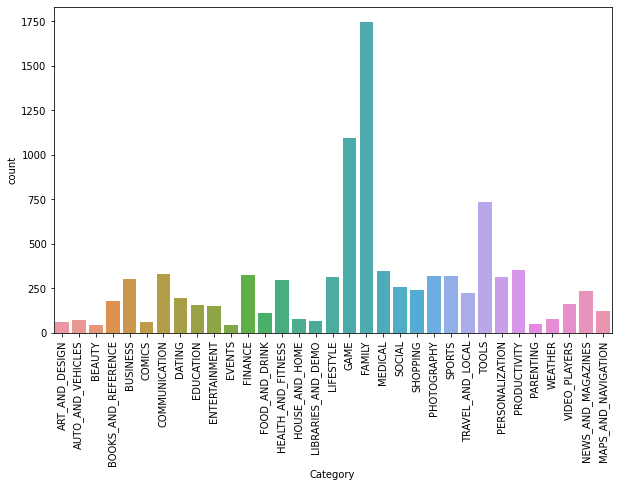

In [21]:
plt.figure(figsize =(10,6))
sns.countplot(x='Category', data=data)
plt.xticks(rotation=90)

GAME 과 FAMILY 카테고리가 다른 카테고리에 비해 많은것을 알 수 있다

Rating과 Category 의 Boxplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

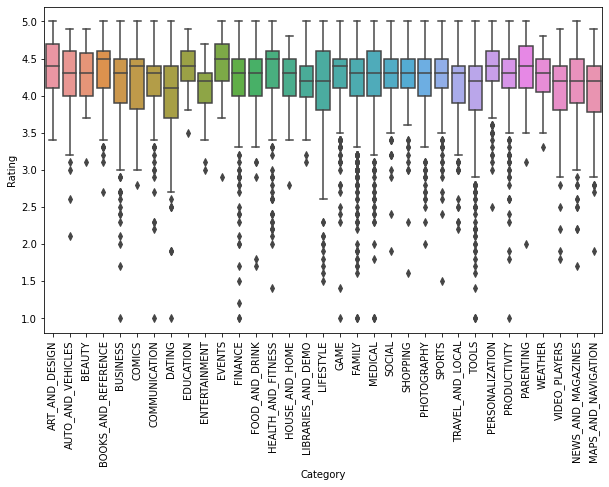

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Category',y='Rating',data = data)
plt.xticks(rotation=90)

카테고리별 Rating의 차이가 그렇게 크지 않다는 것을 알 수있다

# Rating


In [14]:
data['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

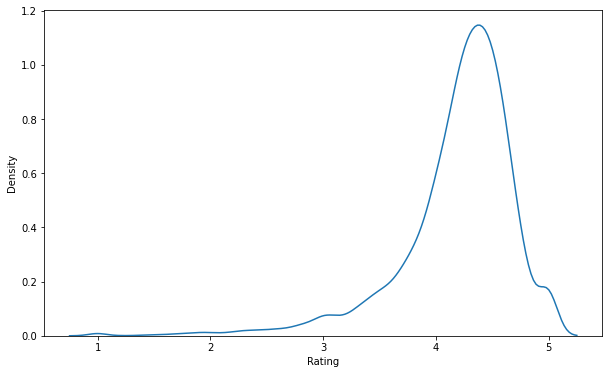

In [17]:
plt.figure(figsize=(10,6))
sns.kdeplot(data.Rating)

# Reviews 

In [27]:
data['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

데이터 타입을 int 형으로 바꿔줄 필요가 있다

In [29]:
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))

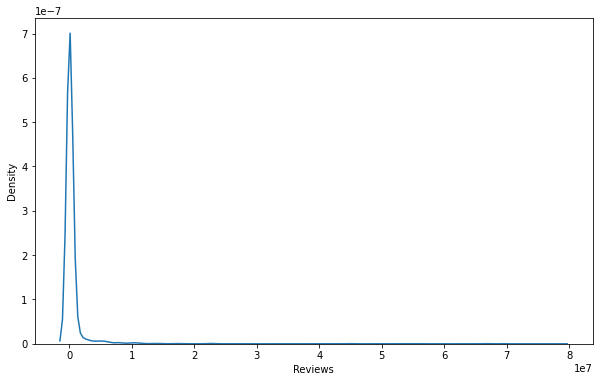

In [30]:
plt.figure(figsize=(10,6))
sns.kdeplot(data.Reviews,)

In [31]:
data[data['Reviews']>5000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device


대부분의 Reviw수는 백만개 이하이고 Reviews수가 높은 것은 유명한 앱들인 것을 알 수 있다

<Figure size 936x576 with 0 Axes>

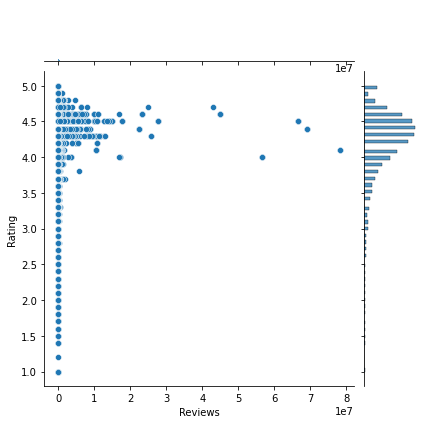

In [34]:
plt.figure(figsize=(13,8))
sns.jointplot(x='Reviews',y='Rating', data=data)

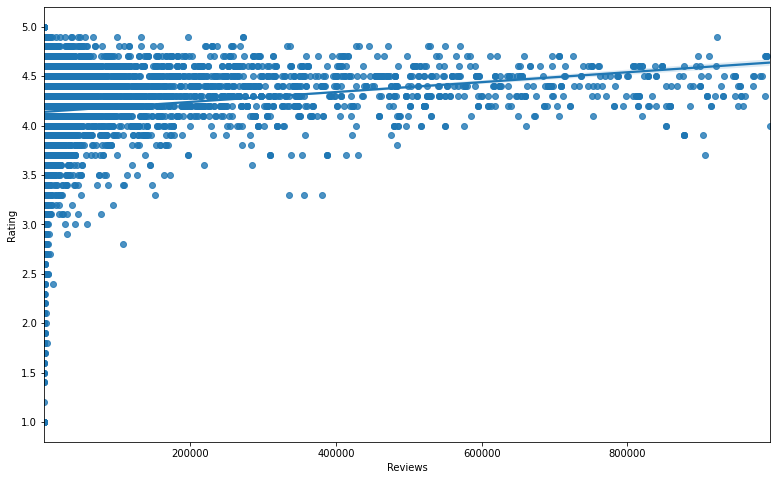

In [35]:
plt.figure(figsize=(13,8))
sns.regplot(x='Reviews',y='Rating', data=data[data['Reviews']<1000000])

리뷰의 수가 많을 수록 Rating이 높은 경향이 있음을 알 수 있다.

# Size
M = 1,000,000<br>
K = 1,000<br>

문자형을 숫자데이터로 변환시켜준다.

In [36]:
data['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [37]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

Size의 데이터 타입이 Object형에서 int형으로 변환해준다

In [39]:
len(data[data['Size'] == 'Varies with device'])

1637

In [40]:
data['Size'].replace('Varies with device', np.nan, inplace=True)

In [41]:
data.Size = (data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

In [42]:
data['Size'].fillna(data.groupby('Category')['Size'].transform('mean'),inplace = True)


<Figure size 720x432 with 0 Axes>

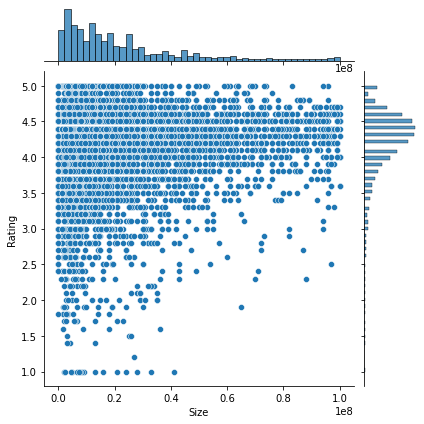

In [43]:
plt.figure(figsize=(10,6))
sns.jointplot(x='Size',y='Rating',data=data)

# Installs

In [47]:
data['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [48]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

# Price
$표시를 없앤후 float형 데이터로 변환

In [ ]:
data['Price'].unique()

array(['0', '$4.99', '$6.99', '$1.49', '$2.99', '$3.99', '$7.99', '$5.99',
       '$1.99', '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99',
       '$11.99', '$79.99', '$16.99', '$14.99', '$1.00', '$29.99',
       '$12.99', '$3.49', '$10.99', '$7.49', '$1.50', '$19.99', '$15.99',
       '$33.99', '$74.99', '$39.99', '$2.49', '$4.49', '$1.70', '$2.00',
       '$3.88', '$25.99', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$1.59', '$6.49', '$1.29',
       '$5.00', '$299.99', '$379.99', '$37.99', '$18.99', '$389.99',
       '$19.90', '$8.49', '$1.75', '$14.00', '$4.85', '$46.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$15.46', '$8.99', '$3.04',
       '$13.99', '$4.29', '$2.60', '$3.28', '$4.60', '$2.90', '$1.97',
       '$89.99', '$2.56', '$3.61', '$1.26', '$1.20', '$1.04'],
      dtype=object)

In [ ]:
data['Price'] = data['Price'].str.replace('$','')
data['Price'] = data['Price'].astype(float)

# Content Rating
번주형 변수로서 One hot encoding을 진행하여 수치형 데이터로 변환


In [ ]:
dp = pd.get_dummies(data['Content Rating'])

data = data.merge(dp,left_index=True,right_index=True)

In [ ]:
data = data.drop(columns ='Content Rating', axis=1)

# Genres
Category 와 매우 유사함으로 Genre 컬럼은 삭제

In [ ]:
data = data.drop(columns='Genres', axis=1)

# LastUpdated
최근 업데이트 된 날짜로서 나중에 날짜데이터를 활용할 가능성이 있으므로 날짜형식으로 변환

In [ ]:
from datetime import datetime

In [ ]:
data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
date_list = []
for str in data['Last Updated']:
  s = datetime.strptime(str,"%B %d, %Y")
  date_list.append(s)


In [ ]:
data['Last Updated'] = date_list

In [ ]:
data.head()

,Rating,Reviews,Size,Installs,Price,Last Updated,Current Ver,Android Ver,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Free,Paid,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,4.1,159,19000000,10000,0.0,2018-01-07,1.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,3.9,967,14000000,500000,0.0,2018-01-15,2.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,4.7,87510,8700000,5000000,0.0,2018-08-01,1.2.4,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,4.5,215644,25000000,50000000,0.0,2018-06-08,Varies with device,4.2 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,4.3,967,2800000,100000,0.0,2018-06-20,1.1,4.4 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


# Current Ver ,Android Ver
버젼은 App마다 update되는 형식이 다르고 이를 통하여 의미있는 피쳐엔지니어링을 하기 어렵다고 생각된다. 여기서는 없애고 사용


In [ ]:
data = data.drop(columns=['Current Ver', 'Android Ver'], axis=1)

In [ ]:
data.head()

,Rating,Reviews,Size,Installs,Price,Last Updated,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Free,Paid,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,4.1,159,19000000,10000,0.0,2018-01-07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,3.9,967,14000000,500000,0.0,2018-01-15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,4.7,87510,8700000,5000000,0.0,2018-08-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,4.5,215644,25000000,50000000,0.0,2018-06-08,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,4.3,967,2800000,100000,0.0,2018-06-20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8989 entries, 0 to 10840
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Rating               8989 non-null   float64       
 1   Reviews              8989 non-null   int64         
 2   Size                 8989 non-null   int64         
 3   Installs             8989 non-null   int64         
 4   Price                8989 non-null   float64       
 5   Last Updated         8989 non-null   datetime64[ns]
 6   ART_AND_DESIGN       8989 non-null   uint8         
 7   AUTO_AND_VEHICLES    8989 non-null   uint8         
 8   BEAUTY               8989 non-null   uint8         
 9   BOOKS_AND_REFERENCE  8989 non-null   uint8         
 10  BUSINESS             8989 non-null   uint8         
 11  COMICS               8989 non-null   uint8         
 12  COMMUNICATION        8989 non-null   uint8         
 13  DATING               8989 non-nu

# 베이스라인 모델링 구현

In [ ]:
from sklearn.model_selection import train_test_split

target = data['Installs']
train = data.drop(columns = ['Installs','Last Updated'], axis=1)

train_x, test_x, train_y, test_y = train_test_split(train, target, random_state=10, test_size=0.3)

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 300, learning_rate=0.1, random_state=10)
xgb.fit(train_x,train_y)
prediction = xgb.predict(test_x)


[11:25:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
test_y

6693         5000
2917     10000000
9275         5000
9490       100000
10496         100
           ...   
8633      5000000
9898          100
1632       100000
9531          500
6534         5000
Name: Installs, Length: 2697, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test_y,prediction)



148829644249412.6

# 변수 선택

In [ ]:
input_var = train.columns

In [ ]:
xgb.feature_importances_
imp_df = pd.DataFrame({"var": input_var,
                       "imp":xgb.feature_importances_})

In [ ]:
imp_df = imp_df.sort_values(by = 'imp', ascending=False)

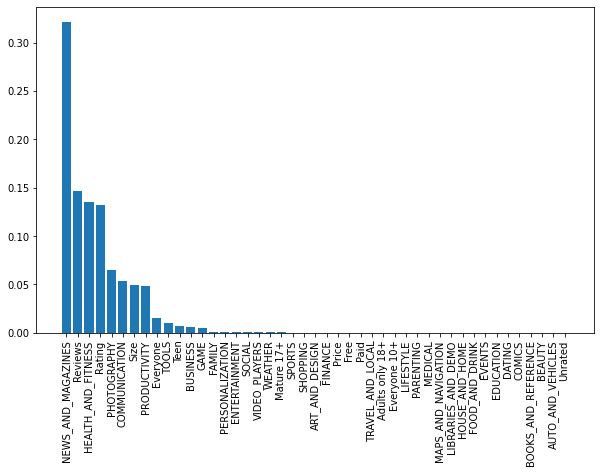

In [ ]:
plt.figure(figsize = (10,6))
plt.bar(imp_df['var'],imp_df['imp'])
plt.xticks(rotation=90)
plt.show()